Load the testing data (Unseen data)

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import numpy
from sklearn import metrics
plt.rcParams['figure.figsize'] = (15, 6)
from math import pi

Using Theano backend.


# Load the Data

In [2]:
X_train = np.load('./titanc/X_train.npy')
y_train = np.load('./titanc/y_train.npy')
X_test = np.load('./titanc/X_test.npy')
y_test = np.load('./titanc/y_test.npy')

print('Number of training examples',len(X_train))
print('Number of validation examples',len(X_test))
print('Number of testing examples',len(X_test))

Number of training examples 712
Number of validation examples 179
Number of testing examples 179


# Initialize the classifiers as the training time


In [3]:
from sklearn.neighbors import KNeighborsClassifier
clf_neigh = KNeighborsClassifier(n_neighbors=5)
clf_neigh.fit(X_train, y_train)
from sklearn.svm import LinearSVC
clf_svm_linear = LinearSVC(C=20.0)
clf_svm_linear.fit(X_train, y_train)
from sklearn.svm import SVC
clf_svm = SVC(C=5.0, kernel='rbf')
clf_svm.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(min_samples_split=2)
clf_dt.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
clf_dt_IG = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
clf_dt_IG.fit(X_train, y_train)
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
clf_dt_BGKN = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                             max_samples=0.5, max_features=0.5)
clf_dt_BGKN.fit(X_train, y_train)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
clf_dt_BGDT = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', min_samples_split=2),
                             max_samples=0.5, max_features=0.5)
clf_dt_BGDT.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
clf_dt_RF = RandomForestClassifier()
#Training
start_time = time.time()
clf_dt_RF.fit(X_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
clf_dt_AD = AdaBoostClassifier()
clf_dt_AD.fit(X_train, y_train)
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_dt_LDA = LinearDiscriminantAnalysis()
clf_dt_LDA.fit(X_train, y_train)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_dt_QDA = QuadraticDiscriminantAnalysis()
clf_dt_QDA.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(C=1e5)
LogReg.fit(X_train, y_train)

from sklearn.gaussian_process import GaussianProcessClassifier
GP = GaussianProcessClassifier()
GP.fit(X_train, y_train)

import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train)
gbm = lgb.LGBMClassifier()
gbm.fit(X_train, y_train)

import xgboost as xgb
XG_Boost = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)


In [4]:
import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.utils import np_utils
labelsTrain = np_utils.to_categorical(y_train)
labelsTest = np_utils.to_categorical(y_test) 
model = Sequential()
model.add(Dense(60,
                input_shape=(9,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))
model.load_weights('/Users/salemameen/Desktop/banditsbook/python_Titanic/titancModelbest.hdf5')
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# UCB1

In [5]:
# MAB_NN(2.5%REMOVED) MODEL1
model1 = Sequential()
model1.add(Dense(60,
                input_shape=(9,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model1.add(Dense(2, activation="softmax"))
model1.load_weights('/Users/salemameen/Desktop/banditsbook/python_Titanic/titancModelbest.hdf5')
model1.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [6]:
# MAB_NN(7.5%REMOVED) MODEL2
model2 = Sequential()
model2.add(Dense(60,
                input_shape=(9,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model2.add(Dense(2, activation="softmax"))
model2.load_weights('/Users/salemameen/Desktop/banditsbook/python_Titanic/titancModelbest.hdf5')
model2.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [7]:
# MAB_NN(65%REMOVED) MODEL3
model3 = Sequential()
model3.add(Dense(60,
                input_shape=(9,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model3.add(Dense(2, activation="softmax"))
model3.load_weights('/Users/salemameen/Desktop/banditsbook/python_Titanic/titancModelbest.hdf5')
model3.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [8]:
# MAB_NN(85%REMOVED) MODEL4
model4 = Sequential()
model4.add(Dense(60,
                input_shape=(9,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model4.add(Dense(2, activation="softmax"))
model4.load_weights('/Users/salemameen/Desktop/banditsbook/python_Titanic/titancModelbest.hdf5')
model4.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

# Espsilon Greedy

In [9]:
model_EG = Sequential()
model_EG.add(Dense(60,
                input_shape=(9,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model_EG.add(Dense(2, activation="softmax"))
model_EG.load_weights('/Users/salemameen/Desktop/banditsbook/python_Titanic/titancModelbest.hdf5')
model_EG.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## Annealing Epsilon Greedy

In [10]:

model_AEG = Sequential()
model_AEG.add(Dense(60,
                input_shape=(9,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model_AEG.add(Dense(2, activation="softmax"))
model_AEG.load_weights('/Users/salemameen/Desktop/banditsbook/python_Titanic/titancModelbest.hdf5')
model_AEG.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## SOFTMAX

In [11]:

model_SM = Sequential()
model_SM.add(Dense(60,
                input_shape=(9,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model_SM.add(Dense(2, activation="softmax"))
model_SM.load_weights('/Users/salemameen/Desktop/banditsbook/python_Titanic/titancModelbest.hdf5')
model_SM.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## ANNEELYING SOFTMAX

In [12]:

model_ASM = Sequential()
model_ASM.add(Dense(60,
                input_shape=(9,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model_ASM.add(Dense(2, activation="softmax"))
model_ASM.load_weights('/Users/salemameen/Desktop/banditsbook/python_Titanic/titancModelbest.hdf5')
model_ASM.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## THOMPSON SAMBLING

In [13]:

model_TS = Sequential()
model_TS.add(Dense(60,
                input_shape=(9,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model_TS.add(Dense(2, activation="softmax"))
model_TS.load_weights('/Users/salemameen/Desktop/banditsbook/python_Titanic/titancModelbest.hdf5')
model_TS.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## HEDGE

In [14]:

model_HG = Sequential()
model_HG.add(Dense(60,
                input_shape=(9,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model_HG.add(Dense(2, activation="softmax"))
model_HG.load_weights('/Users/salemameen/Desktop/banditsbook/python_Titanic/titancModelbest.hdf5')
model_HG.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## EXP3

In [15]:

model_EXP = Sequential()
model_EXP.add(Dense(60,
                input_shape=(9,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model_EXP.add(Dense(2, activation="softmax"))
model_EXP.load_weights('/Users/salemameen/Desktop/banditsbook/python_Titanic/titancModelbest.hdf5')
model_EXP.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## Deployment Time

In [16]:
start_time = time.time()
y_pred_neigh = clf_neigh.predict(X_test)
print("The time of KNN is                       %s seconds" % (time.time() - start_time))
# Linear SVM 
start_time = time.time()
y_pred_svm_linear = clf_svm_linear.predict(X_test)
print("The time of LSVM is                      %s seconds " % (time.time() - start_time))
# SVM kernel='rbf'
start_time = time.time()
y_pred_svm = clf_svm.predict(X_test)
print("The time of SVM is                       %s seconds " % (time.time() - start_time))
# DT with gini
start_time = time.time()
y_pred_gtgini = clf_dt.predict(X_test)
print("The time of DT_gini is                   %s seconds " % (time.time() - start_time))
# DT with entorpy
start_time = time.time()
y_pred_dt_IG = clf_dt_IG.predict(X_test)
print("The time of DT is                        %s seconds" % (time.time() - start_time))
# Bagging with Knn
start_time = time.time()
y_pred_dt_BGKN = clf_dt_BGKN.predict(X_test)
print("The time of Bagging Knn is               %s seconds" % (time.time() - start_time))
# Bagging with DT with gini
start_time = time.time()
y_pred_dt_BGDT = clf_dt_BGDT.predict(X_test)
print("The time of Bagging DT is                 %s seconds " % (time.time() - start_time))
# Random Forest with DT with gini 
start_time = time.time()
y_pred_dt_RF = clf_dt_RF.predict(X_test)
print("The time of Random Forest is              %s seconds " % (time.time() - start_time))
# Ada Boost
start_time = time.time()
y_pred_dt_AD = clf_dt_AD.predict(X_test)
print("The time of Ada Boost is                  %s seconds " % (time.time() - start_time))
# Naive Bayes
start_time = time.time()
y_pred_NB = clf_NB.predict(X_test)
print("The time of Naive Bayes is                 %s seconds " % (time.time() - start_time))
# LDA
start_time = time.time()
y_pred_dt_LDA = clf_dt_LDA.predict(X_test)
print("The time of LDA is                         %s seconds " % (time.time() - start_time))
# QDA
start_time = time.time()
y_pred_dt_QDA = clf_dt_QDA.predict(X_test)
print("The time of QDA is                         %s seconds " % (time.time() - start_time))
# Logistic Regression
start_time = time.time()
y_pred_LR = LogReg.predict(X_test)
print("The time of Logistic Regression is         %s seconds " % (time.time() - start_time))
# Gaussian Process Classifier
start_time = time.time()
y_pred_GP = GP.predict(X_test)
print("The time of Gaussian Process Classifier is  %s seconds " % (time.time() - start_time))
# LightGBM
start_time = time.time()
y_pred_gbm = gbm.predict(X_test)
print("The time of LightGBM is                     %s seconds " % (time.time() - start_time))
# xgboost
start_time = time.time()
y_pred_xgboost = XG_Boost.predict(X_test)
print("The time of xgboost is                     %s seconds " % (time.time() - start_time))
# NN
start_time = time.time()
y_pred_NN = model.predict_classes(X_test, verbose=0)
print("The time of NN is                           %s seconds " % (time.time() - start_time))
# NN 2.5% removed neurals
start_time = time.time()
y_pred_NN1 = model1.predict_classes(X_test, verbose=0)
print("The time of NN2.5 Removed is               %s seconds " % (time.time() - start_time))
# NN 7.5% removed neurals
start_time = time.time()
y_pred_NN2 = model2.predict_classes(X_test, verbose=0)
print("The time of NN7.5 Removed is               %s seconds " % (time.time() - start_time))
# NN 65% removed neurals
start_time = time.time()
y_pred_NN3 = model3.predict_classes(X_test, verbose=0)
print("The time of NN65 Removed is                %s seconds " % (time.time() - start_time))
# NN 85% removed neurals
start_time = time.time()
y_pred_NN4 = model4.predict_classes(X_test, verbose=0)
print("The time of NN85 Removed is                %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING EPSILON GREEDY
start_time = time.time()
y_pred_EG = model_EG.predict_classes(X_test, verbose=0)
print("The time of EPSILON GREEDY Removed is      %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING ANNEELYING EPSILON GREEDY
start_time = time.time()
y_pred_AEG = model_AEG.predict_classes(X_test, verbose=0)
print("The time of DECAYING EPSILON GREEDY Removed is  %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING SOFTMAX
start_time = time.time()
y_pred_SM = model_SM.predict_classes(X_test, verbose=0)
print("The time of SOFTMAX Removed is                  %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING DECAYING SOFTMAX
start_time = time.time()
y_pred_ASM = model_ASM.predict_classes(X_test, verbose=0)
print("The time of DECAYING SOFTMAX Removed is         %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING THOMPSON SAMPLING
start_time = time.time()
y_pred_TS = model_TS.predict_classes(X_test, verbose=0)
print("The time of THOMPSON SAMPLING Removed is        %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING HEDGE
start_time = time.time()
y_pred_HG = model_HG.predict_classes(X_test, verbose=0)
print("The time of HEDGE Removed is                    %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING EXP3
start_time = time.time()
y_pred_EXP = model_EXP.predict_classes(X_test, verbose=0)
print("The time of EXP3 Removed is                    %s seconds " % (time.time() - start_time))

The time of KNN is                       0.0020601749420166016 seconds
The time of LSVM is                      0.00017118453979492188 seconds 
The time of SVM is                       0.0014421939849853516 seconds 
The time of DT_gini is                   0.0003027915954589844 seconds 
The time of DT is                        0.0002841949462890625 seconds
The time of Bagging Knn is               0.009532928466796875 seconds
The time of Bagging DT is                 0.0013818740844726562 seconds 
The time of Random Forest is              0.0013470649719238281 seconds 
The time of Ada Boost is                  0.005015134811401367 seconds 
The time of Naive Bayes is                 0.00032901763916015625 seconds 
The time of LDA is                         0.00024127960205078125 seconds 
The time of QDA is                         0.0003829002380371094 seconds 
The time of Logistic Regression is         0.0002028942108154297 seconds 
The time of Gaussian Process Classifier is  0.002886056

# Accuracy of the models on Testing data

In [17]:
print("The accuracy of KNN:          \t", metrics.accuracy_score(y_test, y_pred_neigh))
print("The accuracy of LSVM:         \t", metrics.accuracy_score(y_test, y_pred_svm_linear))
print("The accuracy of SVM:          \t", metrics.accuracy_score(y_test, y_pred_svm))
print("The accuracy of DT_gini:      \t", metrics.accuracy_score(y_test, y_pred_gtgini))
print("The accuracy of DT_entorpy:   \t", metrics.accuracy_score(y_test, y_pred_dt_IG))
print("The accuracy of Bagging Knn:  \t", metrics.accuracy_score(y_test, y_pred_dt_BGKN))
print("The accuracy of Bagging DT:   \t", metrics.accuracy_score(y_test, y_pred_dt_BGDT))
print("The accuracy of Random Forest:\t", metrics.accuracy_score(y_test, y_pred_dt_RF))
print("The accuracy of Ada Boost:    \t", metrics.accuracy_score(y_test, y_pred_dt_AD))
print("The accuracy of Naive Bayes:  \t", metrics.accuracy_score(y_test, y_pred_NB))
print("The accuracy of LDA:          \t", metrics.accuracy_score(y_test, y_pred_dt_LDA))
print("The accuracy of QDA:          \t", metrics.accuracy_score(y_test, y_pred_dt_QDA))
print("The accuracy of Log. Reg.:    \t", metrics.accuracy_score(y_test, y_pred_LR))
print("The accuracy of GP CLASSI. :  \t", metrics.accuracy_score(y_test, y_pred_GP))
print("The accuracy of LightGBM:     \t", metrics.accuracy_score(y_test, y_pred_gbm))
print("The accuracy of Xgboost:      \t", metrics.accuracy_score(y_test, y_pred_xgboost))
print("The accuracy of NN:           \t", metrics.accuracy_score(y_test, y_pred_NN))
print("The accuracy of NN2.5R:       \t", metrics.accuracy_score(y_test, y_pred_NN1))
print("The accuracy of NN7.5R:       \t", metrics.accuracy_score(y_test, y_pred_NN2))
print("The accuracy of NN65R:        \t", metrics.accuracy_score(y_test, y_pred_NN3))
print("The accuracy of NN85R:        \t", metrics.accuracy_score(y_test, y_pred_NN4))
print("The accuracy of UCB1 NN20R:    \t", metrics.accuracy_score(y_test, y_pred_NN1))
print("The accuracy of E GREEDY  :    \t", metrics.accuracy_score(y_test, y_pred_EG))
print("The accuracy of A e Greegy:    \t", metrics.accuracy_score(y_test, y_pred_AEG))
print("The accuracy of SOFTMAX :      \t", metrics.accuracy_score(y_test, y_pred_SM))
print("The accuracy of A SOFTMAX:     \t", metrics.accuracy_score(y_test, y_pred_ASM))
print("The accuracy of THOMPSON SAM.: \t", metrics.accuracy_score(y_test, y_pred_TS))
print("The accuracy of HEDGE:         \t", metrics.accuracy_score(y_test, y_pred_HG))
print("The accuracy of EXP3 :         \t", metrics.accuracy_score(y_test, y_pred_EXP))

The accuracy of KNN:          	 0.731843575419
The accuracy of LSVM:         	 0.776536312849
The accuracy of SVM:          	 0.787709497207
The accuracy of DT_gini:      	 0.77094972067
The accuracy of DT_entorpy:   	 0.687150837989
The accuracy of Bagging Knn:  	 0.759776536313
The accuracy of Bagging DT:   	 0.737430167598
The accuracy of Random Forest:	 0.703910614525
The accuracy of Ada Boost:    	 0.776536312849
The accuracy of Naive Bayes:  	 0.77094972067
The accuracy of LDA:          	 0.77094972067
The accuracy of QDA:          	 0.804469273743
The accuracy of Log. Reg.:    	 0.776536312849
The accuracy of GP CLASSI. :  	 0.77094972067
The accuracy of LightGBM:     	 0.782122905028
The accuracy of Xgboost:      	 0.787709497207
The accuracy of NN:           	 0.798882681564
The accuracy of NN2.5R:       	 0.798882681564
The accuracy of NN7.5R:       	 0.798882681564
The accuracy of NN65R:        	 0.798882681564
The accuracy of NN85R:        	 0.798882681564
The accuracy of U

# Precision of the models on Testing data

In [18]:
print("Precision of KNN:          \t", metrics.precision_score(y_test, y_pred_neigh))
print("Precision of LSVM:         \t", metrics.precision_score(y_test, y_pred_svm_linear))
print("Precision of SVM:          \t", metrics.precision_score(y_test, y_pred_svm))
print("Precision of DT_gini:      \t", metrics.precision_score(y_test, y_pred_gtgini))
print("Precision of DT_entorpy:   \t", metrics.precision_score(y_test, y_pred_dt_IG))
print("Precision of Bagging Knn:  \t", metrics.precision_score(y_test, y_pred_dt_BGKN))
print("Precision of Bagging DT:   \t", metrics.precision_score(y_test, y_pred_dt_BGDT))
print("Precision of Random Forest:\t", metrics.precision_score(y_test, y_pred_dt_RF))
print("Precision of Ada Boost:    \t", metrics.precision_score(y_test, y_pred_dt_AD))
print("Precision of Naive Bayes:  \t", metrics.precision_score(y_test, y_pred_NB))
print("Precision of LDA:          \t", metrics.precision_score(y_test, y_pred_dt_LDA))
print("Precision of QDA:          \t", metrics.precision_score(y_test, y_pred_dt_QDA))
print("Precision of Log. Reg.:    \t", metrics.precision_score(y_test, y_pred_LR))
print("Precision of GP CLASSI. :  \t", metrics.precision_score(y_test, y_pred_GP))
print("Precision of LightGBM:     \t", metrics.precision_score(y_test, y_pred_gbm))
print("Precision of Xgboost:      \t", metrics.precision_score(y_test, y_pred_xgboost))
print("Precision of NN:           \t", metrics.precision_score(y_test, y_pred_NN))
print("Precision of NN2.5R:       \t", metrics.precision_score(y_test, y_pred_NN1))
print("Precision of NN7.5R:       \t", metrics.precision_score(y_test, y_pred_NN2))
print("Precision of NN65R:        \t", metrics.precision_score(y_test, y_pred_NN3))
print("Precision of NN85R:        \t", metrics.precision_score(y_test, y_pred_NN4))
print("Precision of UCB1 NN20R:    \t", metrics.precision_score(y_test, y_pred_NN1))
print("Precision of E GREEDY  :    \t", metrics.precision_score(y_test, y_pred_EG))
print("Precision of A e Greegy:    \t", metrics.precision_score(y_test, y_pred_AEG))
print("Precision of SOFTMAX :      \t", metrics.precision_score(y_test, y_pred_SM))
print("Precision of A SOFTMAX:     \t", metrics.precision_score(y_test, y_pred_ASM))
print("Precision of THOMPSON SAM.: \t", metrics.precision_score(y_test, y_pred_TS))
print("Precision of HEDGE:         \t", metrics.precision_score(y_test, y_pred_HG))
print("Precision of EXP3 :         \t", metrics.precision_score(y_test, y_pred_EXP))

Precision of KNN:          	 0.671232876712
Precision of LSVM:         	 0.732394366197
Precision of SVM:          	 0.753623188406
Precision of DT_gini:      	 0.710526315789
Precision of DT_entorpy:   	 0.6
Precision of Bagging Knn:  	 0.727272727273
Precision of Bagging DT:   	 0.75
Precision of Random Forest:	 0.661290322581
Precision of Ada Boost:    	 0.72602739726
Precision of Naive Bayes:  	 0.728571428571
Precision of LDA:          	 0.742424242424
Precision of QDA:          	 0.7375
Precision of Log. Reg.:    	 0.753846153846
Precision of GP CLASSI. :  	 0.716216216216
Precision of LightGBM:     	 0.774193548387
Precision of Xgboost:      	 0.796610169492
Precision of NN:           	 0.784615384615
Precision of NN2.5R:       	 0.784615384615
Precision of NN7.5R:       	 0.784615384615
Precision of NN65R:        	 0.784615384615
Precision of NN85R:        	 0.784615384615
Precision of UCB1 NN20R:    	 0.784615384615
Precision of E GREEDY  :    	 0.784615384615
Precision of A e

# Recall of the models on Testing data

In [19]:
print("Recall of KNN :         \t", metrics.recall_score(y_test, y_pred_neigh))
print("Recall of LSVM :        \t", metrics.recall_score(y_test, y_pred_svm_linear))
print("Recall of SVM :         \t", metrics.recall_score(y_test, y_pred_svm))
print("Recall of DT_gini :     \t", metrics.recall_score(y_test, y_pred_gtgini))
print("Recall of DT_entorpy:   \t", metrics.recall_score(y_test, y_pred_dt_IG))
print("Recall of Bagging Knn : \t", metrics.recall_score(y_test, y_pred_dt_BGKN))
print("Recall of Bagging DT :  \t", metrics.recall_score(y_test, y_pred_dt_BGDT))
print("Recall of Random Forest:\t", metrics.recall_score(y_test, y_pred_dt_RF))
print("Recall of Ada Boost :   \t", metrics.recall_score(y_test, y_pred_dt_AD))
print("Recall of Naive Bayes : \t", metrics.recall_score(y_test, y_pred_NB))
print("Recall of LDA :         \t", metrics.recall_score(y_test, y_pred_dt_LDA))
print("Recall of QDA :         \t", metrics.recall_score(y_test, y_pred_dt_QDA))
print("Recall of Log. Reg.:    \t", metrics.recall_score(y_test, y_pred_LR))
print("Recall of GP CLASSI. :  \t", metrics.recall_score(y_test, y_pred_GP))
print("Recall of LightGBM:     \t", metrics.recall_score(y_test, y_pred_gbm))
print("Recall of Xgboost:      \t", metrics.recall_score(y_test, y_pred_xgboost))
print("Recall of NN :          \t", metrics.recall_score(y_test, y_pred_NN))
print("Recall of NN2.5R:       \t", metrics.recall_score(y_test, y_pred_NN1))
print("Recall of NN7.5R:       \t", metrics.recall_score(y_test, y_pred_NN2))
print("Recall of NN65R:        \t", metrics.recall_score(y_test, y_pred_NN3))
print("Recall of NN85R:        \t", metrics.recall_score(y_test, y_pred_NN4))
print("Recall of UCB1 NN20R:    \t", metrics.recall_score(y_test, y_pred_NN1))
print("Recall of E GREEDY  :    \t", metrics.recall_score(y_test, y_pred_EG))
print("Recall of A e Greegy:    \t", metrics.recall_score(y_test, y_pred_AEG))
print("Recall of SOFTMAX :      \t", metrics.recall_score(y_test, y_pred_SM))
print("Recall of A SOFTMAX:     \t", metrics.recall_score(y_test, y_pred_ASM))
print("Recall of THOMPSON SAM.: \t", metrics.recall_score(y_test, y_pred_TS))
print("Recall of HEDGE:         \t", metrics.recall_score(y_test, y_pred_HG))
print("Recall of EXP3 :         \t", metrics.recall_score(y_test, y_pred_EXP))

Recall of KNN :         	 0.671232876712
Recall of LSVM :        	 0.712328767123
Recall of SVM :         	 0.712328767123
Recall of DT_gini :     	 0.739726027397
Recall of DT_entorpy:   	 0.698630136986
Recall of Bagging Knn : 	 0.657534246575
Recall of Bagging DT :  	 0.534246575342
Recall of Random Forest:	 0.561643835616
Recall of Ada Boost :   	 0.72602739726
Recall of Naive Bayes : 	 0.698630136986
Recall of LDA :         	 0.671232876712
Recall of QDA :         	 0.808219178082
Recall of Log. Reg.:    	 0.671232876712
Recall of GP CLASSI. :  	 0.72602739726
Recall of LightGBM:     	 0.657534246575
Recall of Xgboost:      	 0.643835616438
Recall of NN :          	 0.698630136986
Recall of NN2.5R:       	 0.698630136986
Recall of NN7.5R:       	 0.698630136986
Recall of NN65R:        	 0.698630136986
Recall of NN85R:        	 0.698630136986
Recall of UCB1 NN20R:    	 0.698630136986
Recall of E GREEDY  :    	 0.698630136986
Recall of A e Greegy:    	 0.698630136986
Recall of SOFTM

# F1 score of the models on Testing data

In [20]:
print("F1 score of KNN:          \t", metrics.f1_score(y_test, y_pred_neigh))
print("F1 score of LSVM:         \t", metrics.f1_score(y_test, y_pred_svm_linear))
print("F1 score of SVM:          \t", metrics.f1_score(y_test, y_pred_svm))
print("F1 score of DT_gini:      \t", metrics.f1_score(y_test, y_pred_gtgini))
print("F1 score of DT_entorpy:   \t", metrics.f1_score(y_test, y_pred_dt_IG))
print("F1 score of Bagging Knn:  \t", metrics.f1_score(y_test, y_pred_dt_BGKN))
print("F1 score of Bagging DT:   \t", metrics.f1_score(y_test, y_pred_dt_BGDT))
print("F1 score of Random Forest:\t", metrics.f1_score(y_test, y_pred_dt_RF))
print("F1 score of Ada Boost:    \t", metrics.f1_score(y_test, y_pred_dt_AD))
print("F1 score of Naive Bayes:  \t", metrics.f1_score(y_test, y_pred_NB))
print("F1 score of LDA:          \t", metrics.f1_score(y_test, y_pred_dt_LDA))
print("F1 score of QDA:          \t", metrics.f1_score(y_test, y_pred_dt_QDA))
print("F1 score of Log. Reg.:    \t", metrics.f1_score(y_test, y_pred_LR))
print("F1 score of GP CLASSI. :  \t", metrics.f1_score(y_test, y_pred_GP))
print("F1 score of LightGBM:     \t", metrics.f1_score(y_test, y_pred_gbm))
print("F1 score of Xgboost:      \t", metrics.f1_score(y_test, y_pred_xgboost))
print("F1 score of NN:           \t", metrics.f1_score(y_test, y_pred_NN))
print("F1 score of NN2.5R:       \t", metrics.f1_score(y_test, y_pred_NN1))
print("F1 score of NN7.5R:       \t", metrics.f1_score(y_test, y_pred_NN2))
print("F1 score of NN65R:        \t", metrics.f1_score(y_test, y_pred_NN3))
print("F1 score of NN85R:        \t", metrics.f1_score(y_test, y_pred_NN4))
print("F1 score of UCB1 NN20R:    \t", metrics.f1_score(y_test, y_pred_NN1))
print("F1 score of E GREEDY  :    \t", metrics.f1_score(y_test, y_pred_EG))
print("F1 score of A e Greegy:    \t", metrics.f1_score(y_test, y_pred_AEG))
print("F1 score of SOFTMAX :      \t", metrics.f1_score(y_test, y_pred_SM))
print("F1 score of A SOFTMAX:     \t", metrics.f1_score(y_test, y_pred_ASM))
print("F1 score of THOMPSON SAM.: \t", metrics.f1_score(y_test, y_pred_TS))
print("F1 score of HEDGE:         \t", metrics.f1_score(y_test, y_pred_HG))
print("F1 score of EXP3 :         \t", metrics.f1_score(y_test, y_pred_EXP))

F1 score of KNN:          	 0.671232876712
F1 score of LSVM:         	 0.722222222222
F1 score of SVM:          	 0.732394366197
F1 score of DT_gini:      	 0.724832214765
F1 score of DT_entorpy:   	 0.645569620253
F1 score of Bagging Knn:  	 0.690647482014
F1 score of Bagging DT:   	 0.624
F1 score of Random Forest:	 0.607407407407
F1 score of Ada Boost:    	 0.72602739726
F1 score of Naive Bayes:  	 0.713286713287
F1 score of LDA:          	 0.705035971223
F1 score of QDA:          	 0.771241830065
F1 score of Log. Reg.:    	 0.710144927536
F1 score of GP CLASSI. :  	 0.721088435374
F1 score of LightGBM:     	 0.711111111111
F1 score of Xgboost:      	 0.712121212121
F1 score of NN:           	 0.739130434783
F1 score of NN2.5R:       	 0.739130434783
F1 score of NN7.5R:       	 0.739130434783
F1 score of NN65R:        	 0.739130434783
F1 score of NN85R:        	 0.739130434783
F1 score of UCB1 NN20R:    	 0.739130434783
F1 score of E GREEDY  :    	 0.739130434783
F1 score of A e Gre

# Plot the results Comparing to UCB1 three times

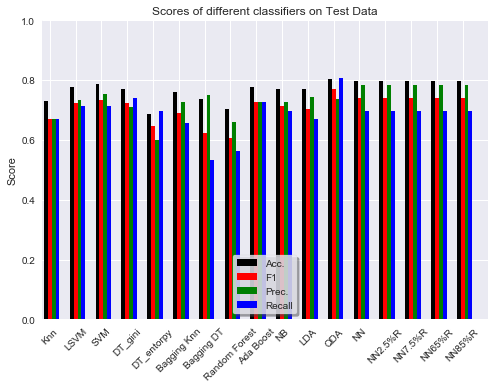

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_test, y_pred_neigh),
           metrics.accuracy_score(y_test, y_pred_svm_linear), 
           metrics.accuracy_score(y_test, y_pred_svm), 
           metrics.accuracy_score(y_test, y_pred_gtgini),
           metrics.accuracy_score(y_test, y_pred_dt_IG), 
           metrics.accuracy_score(y_test, y_pred_dt_BGKN),
           metrics.accuracy_score(y_test, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_test, y_pred_dt_RF),
           metrics.accuracy_score(y_test, y_pred_dt_AD), 
           metrics.accuracy_score(y_test, y_pred_NB),
           metrics.accuracy_score(y_test, y_pred_dt_LDA), 
           metrics.accuracy_score(y_test, y_pred_dt_QDA),
           metrics.accuracy_score(y_test, y_pred_NN),
           metrics.accuracy_score(y_test, y_pred_NN1),
           metrics.accuracy_score(y_test, y_pred_NN2),
           metrics.accuracy_score(y_test, y_pred_NN3),
           metrics.accuracy_score(y_test, y_pred_NN4)]
PresionData = [metrics.precision_score(y_test, y_pred_neigh),
               metrics.precision_score(y_test, y_pred_svm_linear),
               metrics.precision_score(y_test, y_pred_svm),
               metrics.precision_score(y_test, y_pred_gtgini),
               metrics.precision_score(y_test, y_pred_dt_IG),
               metrics.precision_score(y_test, y_pred_dt_BGKN),
               metrics.precision_score(y_test, y_pred_dt_BGDT),
               metrics.precision_score(y_test, y_pred_dt_RF),
               metrics.precision_score(y_test, y_pred_dt_AD),
               metrics.precision_score(y_test, y_pred_NB),
               metrics.precision_score(y_test, y_pred_dt_LDA),
               metrics.precision_score(y_test, y_pred_dt_QDA),
               metrics.precision_score(y_test, y_pred_NN),
               metrics.precision_score(y_test, y_pred_NN1),
               metrics.precision_score(y_test, y_pred_NN2),
               metrics.precision_score(y_test, y_pred_NN3),
               metrics.precision_score(y_test, y_pred_NN4)]
RecallData = [ metrics.recall_score(y_test, y_pred_neigh),
              metrics.recall_score(y_test, y_pred_svm_linear),
              metrics.recall_score(y_test, y_pred_svm),
              metrics.recall_score(y_test, y_pred_gtgini),
              metrics.recall_score(y_test, y_pred_dt_IG),
              metrics.recall_score(y_test, y_pred_dt_BGKN),
              metrics.recall_score(y_test, y_pred_dt_BGDT),
              metrics.recall_score(y_test, y_pred_dt_RF),
              metrics.recall_score(y_test, y_pred_dt_AD),
              metrics.recall_score(y_test, y_pred_NB),
              metrics.recall_score(y_test, y_pred_dt_LDA),
              metrics.recall_score(y_test, y_pred_dt_QDA),
              metrics.recall_score(y_test, y_pred_NN),
              metrics.recall_score(y_test, y_pred_NN1),
              metrics.recall_score(y_test, y_pred_NN2),
              metrics.recall_score(y_test, y_pred_NN3),
              metrics.recall_score(y_test, y_pred_NN4)]
F1Data = [metrics.f1_score(y_test, y_pred_neigh),
          metrics.f1_score(y_test, y_pred_svm_linear),
          metrics.f1_score(y_test, y_pred_svm),
          metrics.f1_score(y_test, y_pred_gtgini),
          metrics.f1_score(y_test, y_pred_dt_IG),
          metrics.f1_score(y_test, y_pred_dt_BGKN),
          metrics.f1_score(y_test, y_pred_dt_BGDT),
          metrics.f1_score(y_test, y_pred_dt_RF),
          metrics.f1_score(y_test, y_pred_dt_AD),
          metrics.f1_score(y_test, y_pred_NB),
          metrics.f1_score(y_test, y_pred_dt_LDA),
          metrics.f1_score(y_test, y_pred_dt_QDA),
          metrics.f1_score(y_test, y_pred_NN),
          metrics.f1_score(y_test, y_pred_NN1),
          metrics.f1_score(y_test, y_pred_NN2),
          metrics.f1_score(y_test, y_pred_NN3),
          metrics.f1_score(y_test, y_pred_NN4)]
N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.15                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' , 'NN', 'NN2.5%R' , 'NN7.5%R' , 'NN65%R' , 'NN85%R']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)
## add a legend

ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True )

plt.show()

In [22]:
import pandas as pd
from math import pi
from bokeh.charts import Bar, Area, defaults
from bokeh.layouts import row
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
#from bokeh.charts.utils import df_from_json
from bokeh.plotting import figure, output_notebook, show
############################################################################################################
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
#defaults.width = 1000
#defaults.height = 800
output_notebook()
df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="The Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

Loading BokehJS ...

## Compare All the results

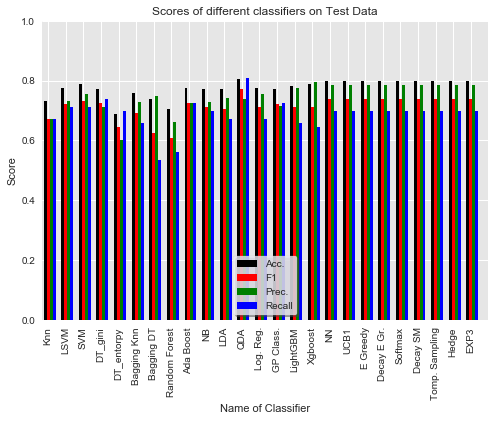

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_test, y_pred_neigh),
           metrics.accuracy_score(y_test, y_pred_svm_linear), 
           metrics.accuracy_score(y_test, y_pred_svm), 
           metrics.accuracy_score(y_test, y_pred_gtgini),
           metrics.accuracy_score(y_test, y_pred_dt_IG), 
           metrics.accuracy_score(y_test, y_pred_dt_BGKN),
           metrics.accuracy_score(y_test, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_test, y_pred_dt_RF),
           metrics.accuracy_score(y_test, y_pred_dt_AD), 
           metrics.accuracy_score(y_test, y_pred_NB),
           metrics.accuracy_score(y_test, y_pred_dt_LDA), 
           metrics.accuracy_score(y_test, y_pred_dt_QDA),           
           metrics.accuracy_score(y_test, y_pred_LR),
           metrics.accuracy_score(y_test, y_pred_GP),
           metrics.accuracy_score(y_test, y_pred_gbm),
           metrics.accuracy_score(y_test, y_pred_xgboost),
           metrics.accuracy_score(y_test, y_pred_NN),        
           metrics.accuracy_score(y_test, y_pred_NN1),
           metrics.accuracy_score(y_test, y_pred_EG),
           metrics.accuracy_score(y_test, y_pred_AEG),
           metrics.accuracy_score(y_test, y_pred_SM),
           metrics.accuracy_score(y_test, y_pred_ASM),
           metrics.accuracy_score(y_test, y_pred_TS),
           metrics.accuracy_score(y_test, y_pred_HG),
           metrics.accuracy_score(y_test, y_pred_EXP)]
          
PresionData = [metrics.precision_score(y_test, y_pred_neigh),
               metrics.precision_score(y_test, y_pred_svm_linear),
               metrics.precision_score(y_test, y_pred_svm),
               metrics.precision_score(y_test, y_pred_gtgini),
               metrics.precision_score(y_test, y_pred_dt_IG),
               metrics.precision_score(y_test, y_pred_dt_BGKN),
               metrics.precision_score(y_test, y_pred_dt_BGDT),
               metrics.precision_score(y_test, y_pred_dt_RF),
               metrics.precision_score(y_test, y_pred_dt_AD),
               metrics.precision_score(y_test, y_pred_NB),
               metrics.precision_score(y_test, y_pred_dt_LDA),
               metrics.precision_score(y_test, y_pred_dt_QDA),              
               metrics.precision_score(y_test, y_pred_LR),
               metrics.precision_score(y_test, y_pred_GP),
               metrics.precision_score(y_test, y_pred_gbm),
               metrics.precision_score(y_test, y_pred_xgboost),
               metrics.precision_score(y_test, y_pred_NN),
               metrics.precision_score(y_test, y_pred_NN1),
               metrics.precision_score(y_test, y_pred_EG),
               metrics.precision_score(y_test, y_pred_AEG),
               metrics.precision_score(y_test, y_pred_SM),
               metrics.precision_score(y_test, y_pred_ASM),
               metrics.precision_score(y_test, y_pred_TS),
               metrics.precision_score(y_test, y_pred_HG),
               metrics.precision_score(y_test, y_pred_EXP)]
RecallData = [ metrics.recall_score(y_test, y_pred_neigh),
              metrics.recall_score(y_test, y_pred_svm_linear),
              metrics.recall_score(y_test, y_pred_svm),
              metrics.recall_score(y_test, y_pred_gtgini),
              metrics.recall_score(y_test, y_pred_dt_IG),
              metrics.recall_score(y_test, y_pred_dt_BGKN),
              metrics.recall_score(y_test, y_pred_dt_BGDT),
              metrics.recall_score(y_test, y_pred_dt_RF),
              metrics.recall_score(y_test, y_pred_dt_AD),
              metrics.recall_score(y_test, y_pred_NB),
              metrics.recall_score(y_test, y_pred_dt_LDA),
              metrics.recall_score(y_test, y_pred_dt_QDA),
              metrics.recall_score(y_test, y_pred_LR),
              metrics.recall_score(y_test, y_pred_GP),
              metrics.recall_score(y_test, y_pred_gbm),
              metrics.recall_score(y_test, y_pred_xgboost),       
              metrics.recall_score(y_test, y_pred_NN),
              metrics.recall_score(y_test, y_pred_NN1),
              metrics.recall_score(y_test, y_pred_AEG),
              metrics.recall_score(y_test, y_pred_EG),
              metrics.recall_score(y_test, y_pred_SM),
              metrics.recall_score(y_test, y_pred_ASM),
              metrics.recall_score(y_test, y_pred_TS),
              metrics.recall_score(y_test, y_pred_HG),
              metrics.recall_score(y_test, y_pred_EXP)]
F1Data = [metrics.f1_score(y_test, y_pred_neigh),
          metrics.f1_score(y_test, y_pred_svm_linear),
          metrics.f1_score(y_test, y_pred_svm),
          metrics.f1_score(y_test, y_pred_gtgini),
          metrics.f1_score(y_test, y_pred_dt_IG),
          metrics.f1_score(y_test, y_pred_dt_BGKN),
          metrics.f1_score(y_test, y_pred_dt_BGDT),
          metrics.f1_score(y_test, y_pred_dt_RF),
          metrics.f1_score(y_test, y_pred_dt_AD),
          metrics.f1_score(y_test, y_pred_NB),
          metrics.f1_score(y_test, y_pred_dt_LDA),
          metrics.f1_score(y_test, y_pred_dt_QDA),         
          metrics.f1_score(y_test, y_pred_LR),
          metrics.f1_score(y_test, y_pred_GP),
          metrics.f1_score(y_test, y_pred_gbm),
          metrics.f1_score(y_test, y_pred_xgboost),
          metrics.f1_score(y_test, y_pred_NN),                             
          metrics.f1_score(y_test, y_pred_NN1),
          metrics.f1_score(y_test, y_pred_EG),
          metrics.f1_score(y_test, y_pred_AEG),
          metrics.f1_score(y_test, y_pred_SM),
          metrics.f1_score(y_test, y_pred_ASM),
          metrics.f1_score(y_test, y_pred_TS),
          metrics.f1_score(y_test, y_pred_HG),
          metrics.f1_score(y_test, y_pred_EXP)]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN', 'UCB1' , 'E Greedy' , 'Decay E Gr.' , 'Softmax', 'Decay SM',
               'Tomp. Sampling', 'Hedge', 'EXP3']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')
plt.show()

In [24]:
import pandas as pd
from math import pi
from bokeh.charts import Bar, Area, defaults
from bokeh.layouts import row
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
#from bokeh.charts.utils import df_from_json
from bokeh.plotting import figure, output_notebook, show
############################################################################################################
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
#defaults.width = 1000
#defaults.height = 800
output_notebook()
df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="The Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

Loading BokehJS ...

## Compare UCB1

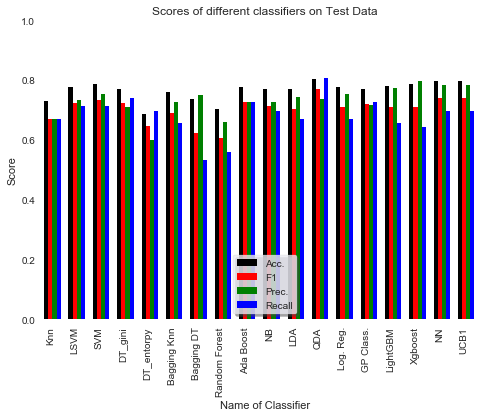

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_test, y_pred_neigh),
           metrics.accuracy_score(y_test, y_pred_svm_linear), 
           metrics.accuracy_score(y_test, y_pred_svm), 
           metrics.accuracy_score(y_test, y_pred_gtgini),
           metrics.accuracy_score(y_test, y_pred_dt_IG), 
           metrics.accuracy_score(y_test, y_pred_dt_BGKN),
           metrics.accuracy_score(y_test, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_test, y_pred_dt_RF),
           metrics.accuracy_score(y_test, y_pred_dt_AD), 
           metrics.accuracy_score(y_test, y_pred_NB),
           metrics.accuracy_score(y_test, y_pred_dt_LDA), 
           metrics.accuracy_score(y_test, y_pred_dt_QDA),           
           metrics.accuracy_score(y_test, y_pred_LR),
           metrics.accuracy_score(y_test, y_pred_GP),
           metrics.accuracy_score(y_test, y_pred_gbm),
           metrics.accuracy_score(y_test, y_pred_xgboost),
           metrics.accuracy_score(y_test, y_pred_NN),        
           metrics.accuracy_score(y_test, y_pred_NN1)]
          
PresionData = [metrics.precision_score(y_test, y_pred_neigh),
               metrics.precision_score(y_test, y_pred_svm_linear),
               metrics.precision_score(y_test, y_pred_svm),
               metrics.precision_score(y_test, y_pred_gtgini),
               metrics.precision_score(y_test, y_pred_dt_IG),
               metrics.precision_score(y_test, y_pred_dt_BGKN),
               metrics.precision_score(y_test, y_pred_dt_BGDT),
               metrics.precision_score(y_test, y_pred_dt_RF),
               metrics.precision_score(y_test, y_pred_dt_AD),
               metrics.precision_score(y_test, y_pred_NB),
               metrics.precision_score(y_test, y_pred_dt_LDA),
               metrics.precision_score(y_test, y_pred_dt_QDA),              
               metrics.precision_score(y_test, y_pred_LR),
               metrics.precision_score(y_test, y_pred_GP),
               metrics.precision_score(y_test, y_pred_gbm),
               metrics.precision_score(y_test, y_pred_xgboost),
               metrics.precision_score(y_test, y_pred_NN),
               metrics.precision_score(y_test, y_pred_NN1)]

RecallData = [ metrics.recall_score(y_test, y_pred_neigh),
              metrics.recall_score(y_test, y_pred_svm_linear),
              metrics.recall_score(y_test, y_pred_svm),
              metrics.recall_score(y_test, y_pred_gtgini),
              metrics.recall_score(y_test, y_pred_dt_IG),
              metrics.recall_score(y_test, y_pred_dt_BGKN),
              metrics.recall_score(y_test, y_pred_dt_BGDT),
              metrics.recall_score(y_test, y_pred_dt_RF),
              metrics.recall_score(y_test, y_pred_dt_AD),
              metrics.recall_score(y_test, y_pred_NB),
              metrics.recall_score(y_test, y_pred_dt_LDA),
              metrics.recall_score(y_test, y_pred_dt_QDA),
              metrics.recall_score(y_test, y_pred_LR),
              metrics.recall_score(y_test, y_pred_GP),
              metrics.recall_score(y_test, y_pred_gbm),
              metrics.recall_score(y_test, y_pred_xgboost),       
              metrics.recall_score(y_test, y_pred_NN),
              metrics.recall_score(y_test, y_pred_NN1)]

F1Data = [metrics.f1_score(y_test, y_pred_neigh),
          metrics.f1_score(y_test, y_pred_svm_linear),
          metrics.f1_score(y_test, y_pred_svm),
          metrics.f1_score(y_test, y_pred_gtgini),
          metrics.f1_score(y_test, y_pred_dt_IG),
          metrics.f1_score(y_test, y_pred_dt_BGKN),
          metrics.f1_score(y_test, y_pred_dt_BGDT),
          metrics.f1_score(y_test, y_pred_dt_RF),
          metrics.f1_score(y_test, y_pred_dt_AD),
          metrics.f1_score(y_test, y_pred_NB),
          metrics.f1_score(y_test, y_pred_dt_LDA),
          metrics.f1_score(y_test, y_pred_dt_QDA),         
          metrics.f1_score(y_test, y_pred_LR),
          metrics.f1_score(y_test, y_pred_GP),
          metrics.f1_score(y_test, y_pred_gbm),
          metrics.f1_score(y_test, y_pred_xgboost),
          metrics.f1_score(y_test, y_pred_NN),                             
          metrics.f1_score(y_test, y_pred_NN1)]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN', 'UCB1']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)


#ax.set_facecolor('white')
ax.patch.set_fill(False)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')
plt.show()

In [26]:
import pandas as pd
from math import pi
from bokeh.charts import Bar, Area, defaults
from bokeh.layouts import row
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
#from bokeh.charts.utils import df_from_json
from bokeh.plotting import figure, output_notebook, show
############################################################################################################
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
#defaults.width = 1000
#defaults.height = 800
output_notebook()
df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="The Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

Loading BokehJS ...

## Compare Epsilon greedy

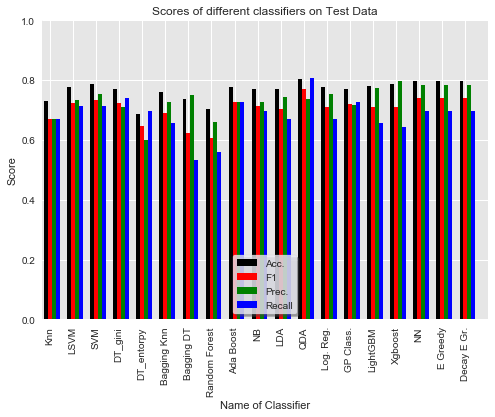

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_test, y_pred_neigh),
           metrics.accuracy_score(y_test, y_pred_svm_linear), 
           metrics.accuracy_score(y_test, y_pred_svm), 
           metrics.accuracy_score(y_test, y_pred_gtgini),
           metrics.accuracy_score(y_test, y_pred_dt_IG), 
           metrics.accuracy_score(y_test, y_pred_dt_BGKN),
           metrics.accuracy_score(y_test, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_test, y_pred_dt_RF),
           metrics.accuracy_score(y_test, y_pred_dt_AD), 
           metrics.accuracy_score(y_test, y_pred_NB),
           metrics.accuracy_score(y_test, y_pred_dt_LDA), 
           metrics.accuracy_score(y_test, y_pred_dt_QDA),           
           metrics.accuracy_score(y_test, y_pred_LR),
           metrics.accuracy_score(y_test, y_pred_GP),
           metrics.accuracy_score(y_test, y_pred_gbm),
           metrics.accuracy_score(y_test, y_pred_xgboost),
           metrics.accuracy_score(y_test, y_pred_NN),        
           metrics.accuracy_score(y_test, y_pred_EG),
           metrics.accuracy_score(y_test, y_pred_AEG)]
          
PresionData = [metrics.precision_score(y_test, y_pred_neigh),
               metrics.precision_score(y_test, y_pred_svm_linear),
               metrics.precision_score(y_test, y_pred_svm),
               metrics.precision_score(y_test, y_pred_gtgini),
               metrics.precision_score(y_test, y_pred_dt_IG),
               metrics.precision_score(y_test, y_pred_dt_BGKN),
               metrics.precision_score(y_test, y_pred_dt_BGDT),
               metrics.precision_score(y_test, y_pred_dt_RF),
               metrics.precision_score(y_test, y_pred_dt_AD),
               metrics.precision_score(y_test, y_pred_NB),
               metrics.precision_score(y_test, y_pred_dt_LDA),
               metrics.precision_score(y_test, y_pred_dt_QDA),              
               metrics.precision_score(y_test, y_pred_LR),
               metrics.precision_score(y_test, y_pred_GP),
               metrics.precision_score(y_test, y_pred_gbm),
               metrics.precision_score(y_test, y_pred_xgboost),
               metrics.precision_score(y_test, y_pred_NN),
               metrics.precision_score(y_test, y_pred_EG),
               metrics.precision_score(y_test, y_pred_AEG)]

RecallData = [ metrics.recall_score(y_test, y_pred_neigh),
              metrics.recall_score(y_test, y_pred_svm_linear),
              metrics.recall_score(y_test, y_pred_svm),
              metrics.recall_score(y_test, y_pred_gtgini),
              metrics.recall_score(y_test, y_pred_dt_IG),
              metrics.recall_score(y_test, y_pred_dt_BGKN),
              metrics.recall_score(y_test, y_pred_dt_BGDT),
              metrics.recall_score(y_test, y_pred_dt_RF),
              metrics.recall_score(y_test, y_pred_dt_AD),
              metrics.recall_score(y_test, y_pred_NB),
              metrics.recall_score(y_test, y_pred_dt_LDA),
              metrics.recall_score(y_test, y_pred_dt_QDA),
              metrics.recall_score(y_test, y_pred_LR),
              metrics.recall_score(y_test, y_pred_GP),
              metrics.recall_score(y_test, y_pred_gbm),
              metrics.recall_score(y_test, y_pred_xgboost),       
              metrics.recall_score(y_test, y_pred_NN),
              metrics.recall_score(y_test, y_pred_AEG),
              metrics.recall_score(y_test, y_pred_EG)]

F1Data = [metrics.f1_score(y_test, y_pred_neigh),
          metrics.f1_score(y_test, y_pred_svm_linear),
          metrics.f1_score(y_test, y_pred_svm),
          metrics.f1_score(y_test, y_pred_gtgini),
          metrics.f1_score(y_test, y_pred_dt_IG),
          metrics.f1_score(y_test, y_pred_dt_BGKN),
          metrics.f1_score(y_test, y_pred_dt_BGDT),
          metrics.f1_score(y_test, y_pred_dt_RF),
          metrics.f1_score(y_test, y_pred_dt_AD),
          metrics.f1_score(y_test, y_pred_NB),
          metrics.f1_score(y_test, y_pred_dt_LDA),
          metrics.f1_score(y_test, y_pred_dt_QDA),         
          metrics.f1_score(y_test, y_pred_LR),
          metrics.f1_score(y_test, y_pred_GP),
          metrics.f1_score(y_test, y_pred_gbm),
          metrics.f1_score(y_test, y_pred_xgboost),
          metrics.f1_score(y_test, y_pred_NN),                             
          metrics.f1_score(y_test, y_pred_EG),
          metrics.f1_score(y_test, y_pred_AEG)]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN',  'E Greedy' , 'Decay E Gr.' ]
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')
plt.show()

In [28]:
import pandas as pd
from math import pi
from bokeh.charts import Bar, Area, defaults
from bokeh.layouts import row
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
#from bokeh.charts.utils import df_from_json
from bokeh.plotting import figure, output_notebook, show
############################################################################################################
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
#defaults.width = 1000
#defaults.height = 800
output_notebook()
df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="The Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

Loading BokehJS ...

## Compare Softmax

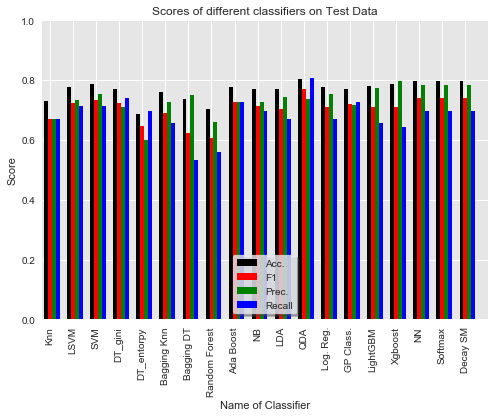

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_test, y_pred_neigh),
           metrics.accuracy_score(y_test, y_pred_svm_linear), 
           metrics.accuracy_score(y_test, y_pred_svm), 
           metrics.accuracy_score(y_test, y_pred_gtgini),
           metrics.accuracy_score(y_test, y_pred_dt_IG), 
           metrics.accuracy_score(y_test, y_pred_dt_BGKN),
           metrics.accuracy_score(y_test, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_test, y_pred_dt_RF),
           metrics.accuracy_score(y_test, y_pred_dt_AD), 
           metrics.accuracy_score(y_test, y_pred_NB),
           metrics.accuracy_score(y_test, y_pred_dt_LDA), 
           metrics.accuracy_score(y_test, y_pred_dt_QDA),           
           metrics.accuracy_score(y_test, y_pred_LR),
           metrics.accuracy_score(y_test, y_pred_GP),
           metrics.accuracy_score(y_test, y_pred_gbm),
           metrics.accuracy_score(y_test, y_pred_xgboost),
           metrics.accuracy_score(y_test, y_pred_NN),        
           metrics.accuracy_score(y_test, y_pred_SM),
           metrics.accuracy_score(y_test, y_pred_ASM)]
          
PresionData = [metrics.precision_score(y_test, y_pred_neigh),
               metrics.precision_score(y_test, y_pred_svm_linear),
               metrics.precision_score(y_test, y_pred_svm),
               metrics.precision_score(y_test, y_pred_gtgini),
               metrics.precision_score(y_test, y_pred_dt_IG),
               metrics.precision_score(y_test, y_pred_dt_BGKN),
               metrics.precision_score(y_test, y_pred_dt_BGDT),
               metrics.precision_score(y_test, y_pred_dt_RF),
               metrics.precision_score(y_test, y_pred_dt_AD),
               metrics.precision_score(y_test, y_pred_NB),
               metrics.precision_score(y_test, y_pred_dt_LDA),
               metrics.precision_score(y_test, y_pred_dt_QDA),              
               metrics.precision_score(y_test, y_pred_LR),
               metrics.precision_score(y_test, y_pred_GP),
               metrics.precision_score(y_test, y_pred_gbm),
               metrics.precision_score(y_test, y_pred_xgboost),
               metrics.precision_score(y_test, y_pred_NN),
               metrics.precision_score(y_test, y_pred_SM),
               metrics.precision_score(y_test, y_pred_ASM)]

RecallData = [ metrics.recall_score(y_test, y_pred_neigh),
              metrics.recall_score(y_test, y_pred_svm_linear),
              metrics.recall_score(y_test, y_pred_svm),
              metrics.recall_score(y_test, y_pred_gtgini),
              metrics.recall_score(y_test, y_pred_dt_IG),
              metrics.recall_score(y_test, y_pred_dt_BGKN),
              metrics.recall_score(y_test, y_pred_dt_BGDT),
              metrics.recall_score(y_test, y_pred_dt_RF),
              metrics.recall_score(y_test, y_pred_dt_AD),
              metrics.recall_score(y_test, y_pred_NB),
              metrics.recall_score(y_test, y_pred_dt_LDA),
              metrics.recall_score(y_test, y_pred_dt_QDA),
              metrics.recall_score(y_test, y_pred_LR),
              metrics.recall_score(y_test, y_pred_GP),
              metrics.recall_score(y_test, y_pred_gbm),
              metrics.recall_score(y_test, y_pred_xgboost),       
              metrics.recall_score(y_test, y_pred_NN),
              metrics.recall_score(y_test, y_pred_SM),
              metrics.recall_score(y_test, y_pred_ASM)]

F1Data = [metrics.f1_score(y_test, y_pred_neigh),
          metrics.f1_score(y_test, y_pred_svm_linear),
          metrics.f1_score(y_test, y_pred_svm),
          metrics.f1_score(y_test, y_pred_gtgini),
          metrics.f1_score(y_test, y_pred_dt_IG),
          metrics.f1_score(y_test, y_pred_dt_BGKN),
          metrics.f1_score(y_test, y_pred_dt_BGDT),
          metrics.f1_score(y_test, y_pred_dt_RF),
          metrics.f1_score(y_test, y_pred_dt_AD),
          metrics.f1_score(y_test, y_pred_NB),
          metrics.f1_score(y_test, y_pred_dt_LDA),
          metrics.f1_score(y_test, y_pred_dt_QDA),         
          metrics.f1_score(y_test, y_pred_LR),
          metrics.f1_score(y_test, y_pred_GP),
          metrics.f1_score(y_test, y_pred_gbm),
          metrics.f1_score(y_test, y_pred_xgboost),
          metrics.f1_score(y_test, y_pred_NN),                             
          metrics.f1_score(y_test, y_pred_SM),
          metrics.f1_score(y_test, y_pred_ASM)]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN',  'Softmax', 'Decay SM']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')
plt.show()

In [30]:
import pandas as pd
from math import pi
from bokeh.charts import Bar, Area, defaults
from bokeh.layouts import row
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
#from bokeh.charts.utils import df_from_json
from bokeh.plotting import figure, output_notebook, show
############################################################################################################
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
#defaults.width = 1000
#defaults.height = 800
output_notebook()
df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="The Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

Loading BokehJS ...

## Compare Esiplon greedy and Softmax

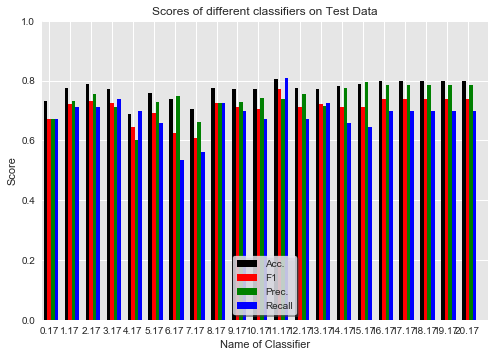

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_test, y_pred_neigh),
           metrics.accuracy_score(y_test, y_pred_svm_linear), 
           metrics.accuracy_score(y_test, y_pred_svm), 
           metrics.accuracy_score(y_test, y_pred_gtgini),
           metrics.accuracy_score(y_test, y_pred_dt_IG), 
           metrics.accuracy_score(y_test, y_pred_dt_BGKN),
           metrics.accuracy_score(y_test, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_test, y_pred_dt_RF),
           metrics.accuracy_score(y_test, y_pred_dt_AD), 
           metrics.accuracy_score(y_test, y_pred_NB),
           metrics.accuracy_score(y_test, y_pred_dt_LDA), 
           metrics.accuracy_score(y_test, y_pred_dt_QDA),           
           metrics.accuracy_score(y_test, y_pred_LR),
           metrics.accuracy_score(y_test, y_pred_GP),
           metrics.accuracy_score(y_test, y_pred_gbm),
           metrics.accuracy_score(y_test, y_pred_xgboost),
           metrics.accuracy_score(y_test, y_pred_NN),        
           metrics.accuracy_score(y_test, y_pred_EG),
           metrics.accuracy_score(y_test, y_pred_AEG),
           metrics.accuracy_score(y_test, y_pred_SM),
           metrics.accuracy_score(y_test, y_pred_ASM)]
          
PresionData = [metrics.precision_score(y_test, y_pred_neigh),
               metrics.precision_score(y_test, y_pred_svm_linear),
               metrics.precision_score(y_test, y_pred_svm),
               metrics.precision_score(y_test, y_pred_gtgini),
               metrics.precision_score(y_test, y_pred_dt_IG),
               metrics.precision_score(y_test, y_pred_dt_BGKN),
               metrics.precision_score(y_test, y_pred_dt_BGDT),
               metrics.precision_score(y_test, y_pred_dt_RF),
               metrics.precision_score(y_test, y_pred_dt_AD),
               metrics.precision_score(y_test, y_pred_NB),
               metrics.precision_score(y_test, y_pred_dt_LDA),
               metrics.precision_score(y_test, y_pred_dt_QDA),              
               metrics.precision_score(y_test, y_pred_LR),
               metrics.precision_score(y_test, y_pred_GP),
               metrics.precision_score(y_test, y_pred_gbm),
               metrics.precision_score(y_test, y_pred_xgboost),
               metrics.precision_score(y_test, y_pred_NN),
               metrics.precision_score(y_test, y_pred_EG),
               metrics.precision_score(y_test, y_pred_AEG),
               metrics.precision_score(y_test, y_pred_SM),
               metrics.precision_score(y_test, y_pred_ASM)]

RecallData = [ metrics.recall_score(y_test, y_pred_neigh),
              metrics.recall_score(y_test, y_pred_svm_linear),
              metrics.recall_score(y_test, y_pred_svm),
              metrics.recall_score(y_test, y_pred_gtgini),
              metrics.recall_score(y_test, y_pred_dt_IG),
              metrics.recall_score(y_test, y_pred_dt_BGKN),
              metrics.recall_score(y_test, y_pred_dt_BGDT),
              metrics.recall_score(y_test, y_pred_dt_RF),
              metrics.recall_score(y_test, y_pred_dt_AD),
              metrics.recall_score(y_test, y_pred_NB),
              metrics.recall_score(y_test, y_pred_dt_LDA),
              metrics.recall_score(y_test, y_pred_dt_QDA),
              metrics.recall_score(y_test, y_pred_LR),
              metrics.recall_score(y_test, y_pred_GP),
              metrics.recall_score(y_test, y_pred_gbm),
              metrics.recall_score(y_test, y_pred_xgboost),       
              metrics.recall_score(y_test, y_pred_NN),
              metrics.recall_score(y_test, y_pred_AEG),
              metrics.recall_score(y_test, y_pred_EG),
              metrics.recall_score(y_test, y_pred_SM),
              metrics.recall_score(y_test, y_pred_ASM)]

F1Data = [metrics.f1_score(y_test, y_pred_neigh),
          metrics.f1_score(y_test, y_pred_svm_linear),
          metrics.f1_score(y_test, y_pred_svm),
          metrics.f1_score(y_test, y_pred_gtgini),
          metrics.f1_score(y_test, y_pred_dt_IG),
          metrics.f1_score(y_test, y_pred_dt_BGKN),
          metrics.f1_score(y_test, y_pred_dt_BGDT),
          metrics.f1_score(y_test, y_pred_dt_RF),
          metrics.f1_score(y_test, y_pred_dt_AD),
          metrics.f1_score(y_test, y_pred_NB),
          metrics.f1_score(y_test, y_pred_dt_LDA),
          metrics.f1_score(y_test, y_pred_dt_QDA),         
          metrics.f1_score(y_test, y_pred_LR),
          metrics.f1_score(y_test, y_pred_GP),
          metrics.f1_score(y_test, y_pred_gbm),
          metrics.f1_score(y_test, y_pred_xgboost),
          metrics.f1_score(y_test, y_pred_NN),                             
          metrics.f1_score(y_test, y_pred_EG),
          metrics.f1_score(y_test, y_pred_AEG),
          metrics.f1_score(y_test, y_pred_SM),
          metrics.f1_score(y_test, y_pred_ASM)]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN',  'E Greedy' , 'Decay E Gr.' , 'Softmax', 'Decay SM']
ax.set_xticks(ind+width)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')
plt.show()

In [32]:
import pandas as pd
from math import pi
from bokeh.charts import Bar, Area, defaults
from bokeh.layouts import row
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
#from bokeh.charts.utils import df_from_json
from bokeh.plotting import figure, output_notebook, show
############################################################################################################
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
#defaults.width = 1000
#defaults.height = 800
output_notebook()
df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="The Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

Loading BokehJS ...

## Hedge and EXP3

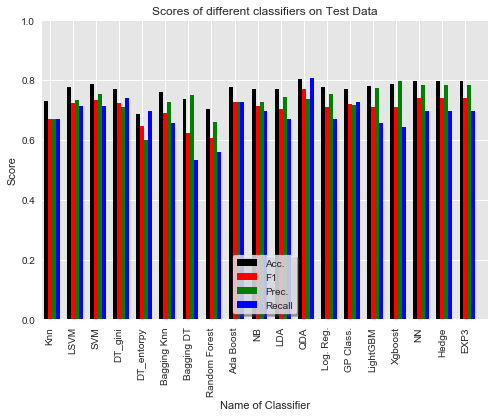

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_test, y_pred_neigh),
           metrics.accuracy_score(y_test, y_pred_svm_linear), 
           metrics.accuracy_score(y_test, y_pred_svm), 
           metrics.accuracy_score(y_test, y_pred_gtgini),
           metrics.accuracy_score(y_test, y_pred_dt_IG), 
           metrics.accuracy_score(y_test, y_pred_dt_BGKN),
           metrics.accuracy_score(y_test, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_test, y_pred_dt_RF),
           metrics.accuracy_score(y_test, y_pred_dt_AD), 
           metrics.accuracy_score(y_test, y_pred_NB),
           metrics.accuracy_score(y_test, y_pred_dt_LDA), 
           metrics.accuracy_score(y_test, y_pred_dt_QDA),           
           metrics.accuracy_score(y_test, y_pred_LR),
           metrics.accuracy_score(y_test, y_pred_GP),
           metrics.accuracy_score(y_test, y_pred_gbm),
           metrics.accuracy_score(y_test, y_pred_xgboost),
           metrics.accuracy_score(y_test, y_pred_NN),        
           metrics.accuracy_score(y_test, y_pred_HG),
           metrics.accuracy_score(y_test, y_pred_EXP)]
          
PresionData = [metrics.precision_score(y_test, y_pred_neigh),
               metrics.precision_score(y_test, y_pred_svm_linear),
               metrics.precision_score(y_test, y_pred_svm),
               metrics.precision_score(y_test, y_pred_gtgini),
               metrics.precision_score(y_test, y_pred_dt_IG),
               metrics.precision_score(y_test, y_pred_dt_BGKN),
               metrics.precision_score(y_test, y_pred_dt_BGDT),
               metrics.precision_score(y_test, y_pred_dt_RF),
               metrics.precision_score(y_test, y_pred_dt_AD),
               metrics.precision_score(y_test, y_pred_NB),
               metrics.precision_score(y_test, y_pred_dt_LDA),
               metrics.precision_score(y_test, y_pred_dt_QDA),              
               metrics.precision_score(y_test, y_pred_LR),
               metrics.precision_score(y_test, y_pred_GP),
               metrics.precision_score(y_test, y_pred_gbm),
               metrics.precision_score(y_test, y_pred_xgboost),
               metrics.precision_score(y_test, y_pred_NN),
               metrics.precision_score(y_test, y_pred_HG),
               metrics.precision_score(y_test, y_pred_EXP)]

RecallData = [ metrics.recall_score(y_test, y_pred_neigh),
              metrics.recall_score(y_test, y_pred_svm_linear),
              metrics.recall_score(y_test, y_pred_svm),
              metrics.recall_score(y_test, y_pred_gtgini),
              metrics.recall_score(y_test, y_pred_dt_IG),
              metrics.recall_score(y_test, y_pred_dt_BGKN),
              metrics.recall_score(y_test, y_pred_dt_BGDT),
              metrics.recall_score(y_test, y_pred_dt_RF),
              metrics.recall_score(y_test, y_pred_dt_AD),
              metrics.recall_score(y_test, y_pred_NB),
              metrics.recall_score(y_test, y_pred_dt_LDA),
              metrics.recall_score(y_test, y_pred_dt_QDA),
              metrics.recall_score(y_test, y_pred_LR),
              metrics.recall_score(y_test, y_pred_GP),
              metrics.recall_score(y_test, y_pred_gbm),
              metrics.recall_score(y_test, y_pred_xgboost),       
              metrics.recall_score(y_test, y_pred_NN),
              metrics.recall_score(y_test, y_pred_HG),
              metrics.recall_score(y_test, y_pred_EXP)]

F1Data = [metrics.f1_score(y_test, y_pred_neigh),
          metrics.f1_score(y_test, y_pred_svm_linear),
          metrics.f1_score(y_test, y_pred_svm),
          metrics.f1_score(y_test, y_pred_gtgini),
          metrics.f1_score(y_test, y_pred_dt_IG),
          metrics.f1_score(y_test, y_pred_dt_BGKN),
          metrics.f1_score(y_test, y_pred_dt_BGDT),
          metrics.f1_score(y_test, y_pred_dt_RF),
          metrics.f1_score(y_test, y_pred_dt_AD),
          metrics.f1_score(y_test, y_pred_NB),
          metrics.f1_score(y_test, y_pred_dt_LDA),
          metrics.f1_score(y_test, y_pred_dt_QDA),         
          metrics.f1_score(y_test, y_pred_LR),
          metrics.f1_score(y_test, y_pred_GP),
          metrics.f1_score(y_test, y_pred_gbm),
          metrics.f1_score(y_test, y_pred_xgboost),
          metrics.f1_score(y_test, y_pred_NN),                             
          metrics.f1_score(y_test, y_pred_HG),
          metrics.f1_score(y_test, y_pred_EXP)]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN', 'Hedge', 'EXP3']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')
plt.show()

In [34]:
import pandas as pd
from math import pi
from bokeh.charts import Bar, Area, defaults
from bokeh.layouts import row
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
#from bokeh.charts.utils import df_from_json
from bokeh.plotting import figure, output_notebook, show
############################################################################################################
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
#defaults.width = 1000
#defaults.height = 800
output_notebook()
df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="The Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

Loading BokehJS ...

## Thompson Sampling

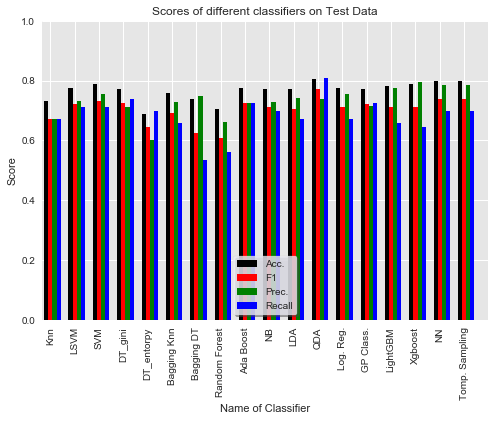

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_test, y_pred_neigh),
           metrics.accuracy_score(y_test, y_pred_svm_linear), 
           metrics.accuracy_score(y_test, y_pred_svm), 
           metrics.accuracy_score(y_test, y_pred_gtgini),
           metrics.accuracy_score(y_test, y_pred_dt_IG), 
           metrics.accuracy_score(y_test, y_pred_dt_BGKN),
           metrics.accuracy_score(y_test, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_test, y_pred_dt_RF),
           metrics.accuracy_score(y_test, y_pred_dt_AD), 
           metrics.accuracy_score(y_test, y_pred_NB),
           metrics.accuracy_score(y_test, y_pred_dt_LDA), 
           metrics.accuracy_score(y_test, y_pred_dt_QDA),           
           metrics.accuracy_score(y_test, y_pred_LR),
           metrics.accuracy_score(y_test, y_pred_GP),
           metrics.accuracy_score(y_test, y_pred_gbm),
           metrics.accuracy_score(y_test, y_pred_xgboost),
           metrics.accuracy_score(y_test, y_pred_NN),
           metrics.accuracy_score(y_test, y_pred_TS)]
          
PresionData = [metrics.precision_score(y_test, y_pred_neigh),
               metrics.precision_score(y_test, y_pred_svm_linear),
               metrics.precision_score(y_test, y_pred_svm),
               metrics.precision_score(y_test, y_pred_gtgini),
               metrics.precision_score(y_test, y_pred_dt_IG),
               metrics.precision_score(y_test, y_pred_dt_BGKN),
               metrics.precision_score(y_test, y_pred_dt_BGDT),
               metrics.precision_score(y_test, y_pred_dt_RF),
               metrics.precision_score(y_test, y_pred_dt_AD),
               metrics.precision_score(y_test, y_pred_NB),
               metrics.precision_score(y_test, y_pred_dt_LDA),
               metrics.precision_score(y_test, y_pred_dt_QDA),              
               metrics.precision_score(y_test, y_pred_LR),
               metrics.precision_score(y_test, y_pred_GP),
               metrics.precision_score(y_test, y_pred_gbm),
               metrics.precision_score(y_test, y_pred_xgboost),
               metrics.precision_score(y_test, y_pred_NN),
               metrics.precision_score(y_test, y_pred_TS)]

RecallData = [ metrics.recall_score(y_test, y_pred_neigh),
              metrics.recall_score(y_test, y_pred_svm_linear),
              metrics.recall_score(y_test, y_pred_svm),
              metrics.recall_score(y_test, y_pred_gtgini),
              metrics.recall_score(y_test, y_pred_dt_IG),
              metrics.recall_score(y_test, y_pred_dt_BGKN),
              metrics.recall_score(y_test, y_pred_dt_BGDT),
              metrics.recall_score(y_test, y_pred_dt_RF),
              metrics.recall_score(y_test, y_pred_dt_AD),
              metrics.recall_score(y_test, y_pred_NB),
              metrics.recall_score(y_test, y_pred_dt_LDA),
              metrics.recall_score(y_test, y_pred_dt_QDA),
              metrics.recall_score(y_test, y_pred_LR),
              metrics.recall_score(y_test, y_pred_GP),
              metrics.recall_score(y_test, y_pred_gbm),
              metrics.recall_score(y_test, y_pred_xgboost),       
              metrics.recall_score(y_test, y_pred_NN),
              metrics.recall_score(y_test, y_pred_TS)]

F1Data = [metrics.f1_score(y_test, y_pred_neigh),
          metrics.f1_score(y_test, y_pred_svm_linear),
          metrics.f1_score(y_test, y_pred_svm),
          metrics.f1_score(y_test, y_pred_gtgini),
          metrics.f1_score(y_test, y_pred_dt_IG),
          metrics.f1_score(y_test, y_pred_dt_BGKN),
          metrics.f1_score(y_test, y_pred_dt_BGDT),
          metrics.f1_score(y_test, y_pred_dt_RF),
          metrics.f1_score(y_test, y_pred_dt_AD),
          metrics.f1_score(y_test, y_pred_NB),
          metrics.f1_score(y_test, y_pred_dt_LDA),
          metrics.f1_score(y_test, y_pred_dt_QDA),         
          metrics.f1_score(y_test, y_pred_LR),
          metrics.f1_score(y_test, y_pred_GP),
          metrics.f1_score(y_test, y_pred_gbm),
          metrics.f1_score(y_test, y_pred_xgboost),
          metrics.f1_score(y_test, y_pred_NN),                             
          metrics.f1_score(y_test, y_pred_TS)]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN', 'Tomp. Sampling']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')
plt.show()

In [36]:
import pandas as pd
from math import pi
from bokeh.charts import Bar, Area, defaults
from bokeh.layouts import row
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
#from bokeh.charts.utils import df_from_json
from bokeh.plotting import figure, output_notebook, show
############################################################################################################
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
#defaults.width = 1000
#defaults.height = 800
output_notebook()
df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="The Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

Loading BokehJS ...

# Compute Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(targetLabel))
    plt.xticks(tick_marks, targetLabel)
    plt.yticks(tick_marks, targetLabel)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
targetLabel = np.array(['spam','not spam'])

## Compute Confusion on Knn

Confusion matrix, without normalization
[[82 24]
 [24 49]]
Normalized confusion matrix
[[ 0.77  0.23]
 [ 0.33  0.67]]


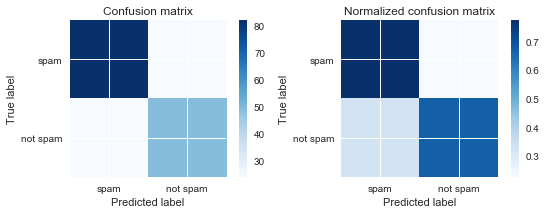

In [38]:
cm = confusion_matrix(y_test, y_pred_neigh)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on LSVM

Confusion matrix, without normalization
[[87 19]
 [21 52]]
Normalized confusion matrix
[[ 0.82  0.18]
 [ 0.29  0.71]]


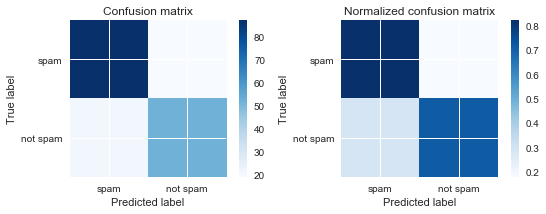

In [39]:
cm = confusion_matrix(y_test, y_pred_svm_linear)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on SVM

Confusion matrix, without normalization
[[89 17]
 [21 52]]
Normalized confusion matrix
[[ 0.84  0.16]
 [ 0.29  0.71]]


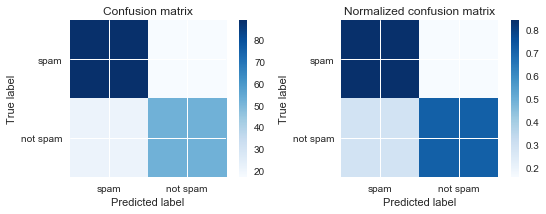

In [40]:
cm = confusion_matrix(y_test, y_pred_svm)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on DT with gini "CART"

Confusion matrix, without normalization
[[84 22]
 [19 54]]
Normalized confusion matrix
[[ 0.79  0.21]
 [ 0.26  0.74]]


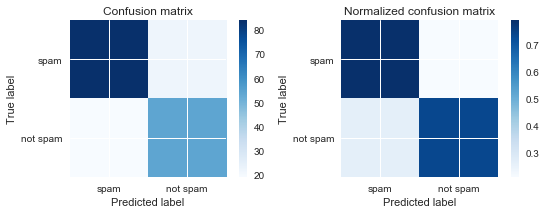

In [41]:
cm = confusion_matrix(y_test, y_pred_gtgini)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on DT with entory "C5.0"

Confusion matrix, without normalization
[[72 34]
 [22 51]]
Normalized confusion matrix
[[ 0.68  0.32]
 [ 0.3   0.7 ]]


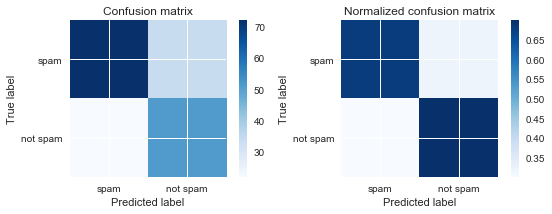

In [42]:
cm = confusion_matrix(y_test, y_pred_dt_IG)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Bagging with Knn

Confusion matrix, without normalization
[[88 18]
 [25 48]]
Normalized confusion matrix
[[ 0.83  0.17]
 [ 0.34  0.66]]


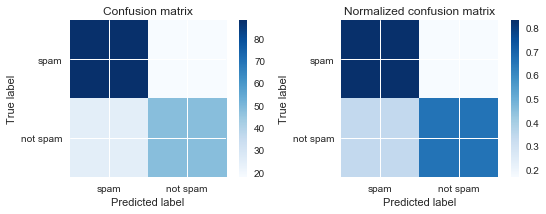

In [43]:
cm = confusion_matrix(y_test, y_pred_dt_BGKN)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Bagging with DT "CART"

Confusion matrix, without normalization
[[93 13]
 [34 39]]
Normalized confusion matrix
[[ 0.88  0.12]
 [ 0.47  0.53]]


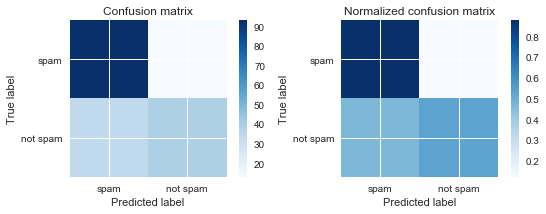

In [44]:
cm = confusion_matrix(y_test, y_pred_dt_BGDT)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Random Forest

Confusion matrix, without normalization
[[85 21]
 [32 41]]
Normalized confusion matrix
[[ 0.8   0.2 ]
 [ 0.44  0.56]]


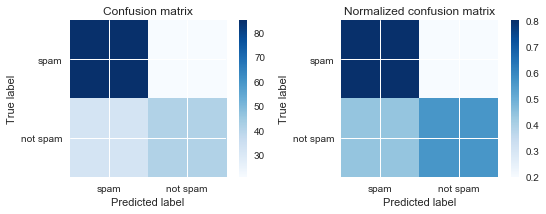

In [45]:
cm = confusion_matrix(y_test, y_pred_dt_RF)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Ada Boost

Confusion matrix, without normalization
[[86 20]
 [20 53]]
Normalized confusion matrix
[[ 0.81  0.19]
 [ 0.27  0.73]]


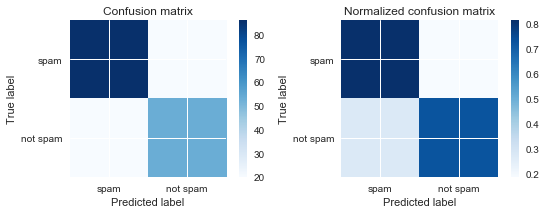

In [46]:
cm = confusion_matrix(y_test, y_pred_dt_AD)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Naive Bayes


Confusion matrix, without normalization
[[87 19]
 [22 51]]
Normalized confusion matrix
[[ 0.82  0.18]
 [ 0.3   0.7 ]]


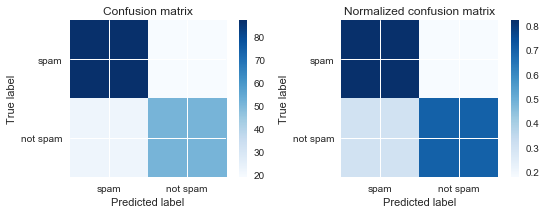

In [47]:
cm = confusion_matrix(y_test, y_pred_NB)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on LDA

Confusion matrix, without normalization
[[89 17]
 [24 49]]
Normalized confusion matrix
[[ 0.84  0.16]
 [ 0.33  0.67]]


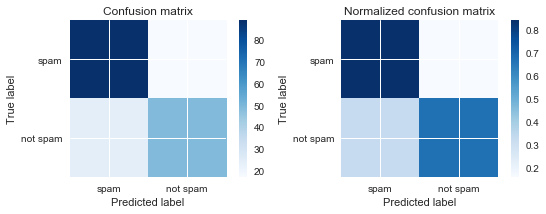

In [48]:
cm = confusion_matrix(y_test, y_pred_dt_LDA)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on QDA

Confusion matrix, without normalization
[[85 21]
 [14 59]]
Normalized confusion matrix
[[ 0.8   0.2 ]
 [ 0.19  0.81]]


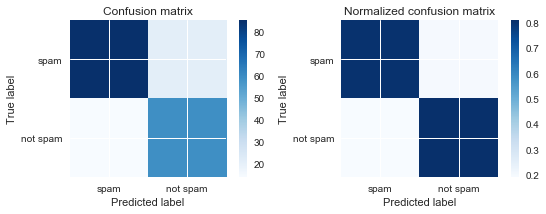

In [49]:
cm = confusion_matrix(y_test, y_pred_dt_QDA)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN


Confusion matrix, without normalization
[[92 14]
 [22 51]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.3   0.7 ]]


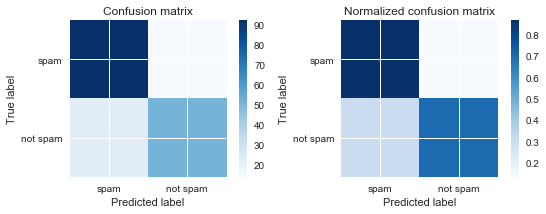

In [50]:
cm = confusion_matrix(y_test, y_pred_NN)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on UCB1 NN 2.5% neurals removed

Confusion matrix, without normalization
[[92 14]
 [22 51]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.3   0.7 ]]


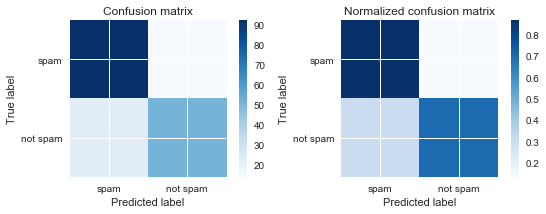

In [51]:
cm = confusion_matrix(y_test, y_pred_NN1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 7.5% neurals removed

Confusion matrix, without normalization
[[92 14]
 [22 51]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.3   0.7 ]]


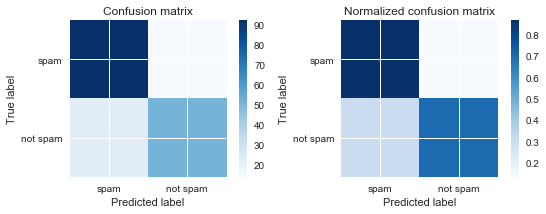

In [52]:
cm = confusion_matrix(y_test, y_pred_NN2)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 65% neurals removed

Confusion matrix, without normalization
[[92 14]
 [22 51]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.3   0.7 ]]


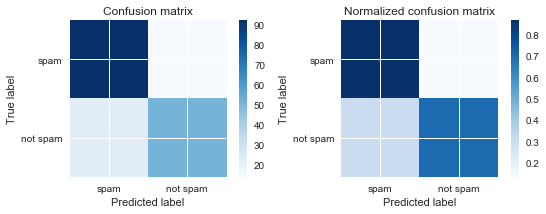

In [53]:
cm = confusion_matrix(y_test, y_pred_NN3)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 85% neurals removed

Confusion matrix, without normalization
[[92 14]
 [22 51]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.3   0.7 ]]


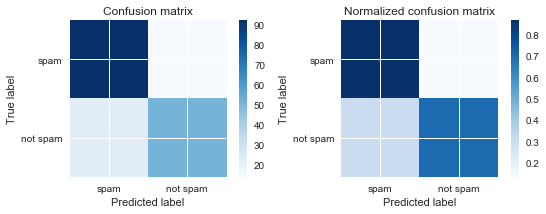

In [54]:
cm = confusion_matrix(y_test, y_pred_NN4)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Epsilon Greedy neurals removed

Confusion matrix, without normalization
[[92 14]
 [22 51]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.3   0.7 ]]


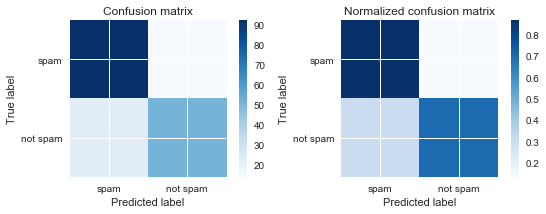

In [55]:
cm = confusion_matrix(y_test, y_pred_EG)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Decaying Epsilon Greedy neurals removed

Confusion matrix, without normalization
[[92 14]
 [22 51]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.3   0.7 ]]


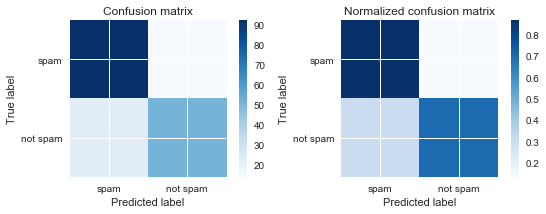

In [56]:
cm = confusion_matrix(y_test, y_pred_AEG)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)
plot_confusion_matrix(cm)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

## Compute Confusion on SOFTMAX neurals removed

Confusion matrix, without normalization
[[92 14]
 [22 51]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.3   0.7 ]]


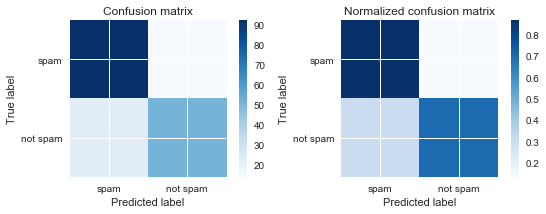

In [57]:
cm = confusion_matrix(y_test, y_pred_SM)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)
plot_confusion_matrix(cm)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

## Compute Confusion on DECAYING SOFTMAX neurals removed

Confusion matrix, without normalization
[[92 14]
 [22 51]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.3   0.7 ]]


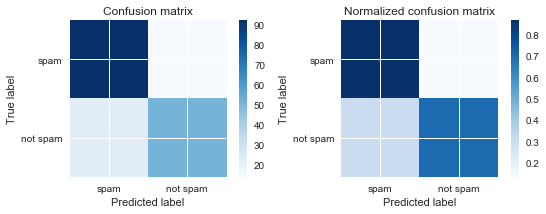

In [58]:
cm = confusion_matrix(y_test, y_pred_ASM)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)
plot_confusion_matrix(cm)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

## Compute Confusion on THOMPSON SAMPLING neurals removed

Confusion matrix, without normalization
[[92 14]
 [22 51]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.3   0.7 ]]


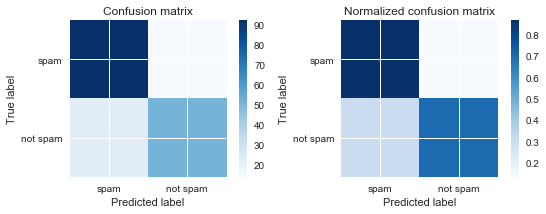

In [59]:
cm = confusion_matrix(y_test, y_pred_TS)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)
plot_confusion_matrix(cm)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

## Compute Confusion on HEDGE neurals removed

Confusion matrix, without normalization
[[92 14]
 [22 51]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.3   0.7 ]]


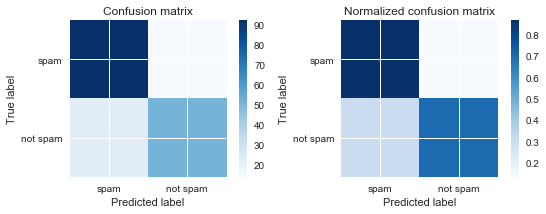

In [60]:
cm = confusion_matrix(y_test, y_pred_HG)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)
plot_confusion_matrix(cm)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

## Compute Confusion on EXP3 neurals removed

Confusion matrix, without normalization
[[92 14]
 [22 51]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.3   0.7 ]]


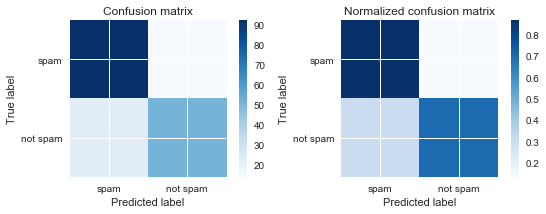

In [61]:
cm = confusion_matrix(y_test, y_pred_EXP)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)
plot_confusion_matrix(cm)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()